In [3]:
# Import libraries and functions
import numpy as np
from scipy.io import loadmat
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#Load first original excercise file
x = loadmat('../Data/M1-DeepSquat.mat')
correct = x['Train_Data']
T1 = correct.shape[1]
incorrect = x['Test_Data']
T2 = incorrect.shape[1]

In [5]:
#Append the arrays in 3D format
Train_Data = []
Test_Data = []
for i in range(T1):
    Train_Data.append(correct[0,i])
for i in range(T2):
    Test_Data.append(incorrect[0,i])
Train_Data = np.dstack(Train_Data)
Train_Data = np.rollaxis(Train_Data,-1)
Test_Data = np.dstack(Test_Data)
Test_Data = np.rollaxis(Test_Data,-1)

Train_Data_org = Train_Data
Test_data_org = Test_Data


In [6]:
#Calculate samples,timesteps,features
samples = Train_Data.shape[0]
timesteps = Train_Data.shape[1]
features = Train_Data.shape[2]
Train_Data = np.reshape(Train_Data,(samples*timesteps,features))
Test_Data = np.reshape(Test_Data,(samples*timesteps,features))

In [7]:
#Data scaling
Train_Data = StandardScaler().fit_transform(Train_Data)
print(Train_Data.shape)

(21600, 117)


In [8]:
#Construct PCA
pca = PCA(n_components=4)
pca.fit(Train_Data)
#Reduce train data
Train_Data_Reduced = pca.transform(Train_Data)
print(pca.n_components_)
print(Train_Data_Reduced.shape)
print(Train_Data_Reduced)
#Reduce test data
Test_Data_Reduced = pca.transform(Test_Data)
print(pca.n_components_)
print(Test_Data_Reduced.shape)
print(Test_Data_Reduced)

4
(21600, 4)
[[11.09071883  5.01149696 -2.65187019 -2.71928548]
 [11.02539393  4.99412746 -2.68627528 -2.71466542]
 [10.95714298  4.98049138 -2.71852714 -2.70246093]
 ...
 [ 9.96499929 -3.62125687 -4.39632859  0.04472586]
 [ 9.97921274 -3.59844678 -4.34516831 -0.0305644 ]
 [ 9.98940306 -3.57670062 -4.29304879 -0.10203204]]
4
(21600, 4)
[[ 0.92182311  0.02087192  0.08971587 -0.16039405]
 [ 0.91990876  0.02095853  0.09057661 -0.16060934]
 [ 0.91794083  0.02106196  0.09143203 -0.16093954]
 ...
 [ 1.37661763  0.13050343 -0.47609959  0.42226079]
 [ 1.39423625  0.13370463 -0.48203648  0.43395569]
 [ 1.41104729  0.13680788 -0.48749802  0.44520216]]


In [9]:
#Reshape data to original format
Train_Data_Reduced = np.reshape(Train_Data_Reduced,(samples,timesteps,pca.n_components_))
Test_Data_Reduced = np.reshape(Test_Data_Reduced,(samples,timesteps,pca.n_components_))

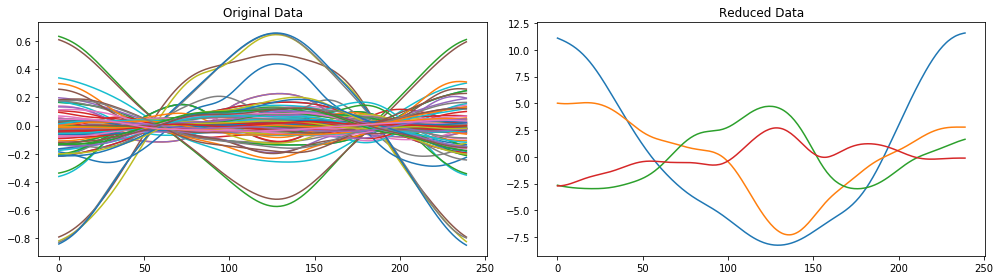

In [10]:
#Plot original and reduced data
plt.figure(figsize = (14,4))
# display original sequences
plt.subplot(1,2,1)
plt.plot(Train_Data_org[0])
plt.title('Original Data')
# display reduced sequence
plt.subplot(1,2,2)
plt.plot(Train_Data_Reduced[0])
plt.title('Reduced Data')
plt.tight_layout()
plt.show()

In [11]:
#Reshape data to 2D format to save in csv format
csv_correct = Train_Data_Reduced.reshape(samples,timesteps*pca.n_components_)
np.savetxt('../Data/PCA_reduced_correct.csv', csv_correct ,delimiter=',')
csv_incorrect = Test_Data_Reduced.reshape(samples,timesteps*pca.n_components_)
np.savetxt('../Data/PCA_reduced_incorrect.csv', csv_incorrect ,delimiter=',')